In [1]:
#Output variable -> y
#y -> Whether the client has subscribed a term deposit or not 
#Binomial ("yes" or "no")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [4]:
df=pd.read_csv("bank-full.csv",sep=';')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
df2=df.copy()

In [11]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [24]:
df_o=df2[['age']]

In [25]:
df_o

,age
0,58
1,44
2,33
3,47
4,33
...,...
45206,51
45207,71
45208,72
45209,57


In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_o=sc.fit_transform(df_o)


In [28]:
df_o

array([[ 1.60696496],
       [ 0.28852927],
       [-0.74738448],
       ...,
       [ 2.92540065],
       [ 1.51279098],
       [-0.37068857]])

In [29]:
out=[]
for var in df_o[:,0]:
    if var>3 or var<-3:
        out.append(var)

In [30]:
len(out)

381

In [31]:
for i in out:
    age=i*10.618762+40.936210
    print(age)

83.00046482527046
75.00037638062936
75.00037638062936
83.00046482527046
75.00037638062936
76.00038743620951
83.00046482527046
85.00048693643073
90.0005422143314
82.00045376969032
73.00035426946909
74.00036532504923
75.00037638062936
78.00040954736977
85.00048693643073
80.00043165853005
78.00040954736977
73.00035426946909
75.00037638062936
94.00058643665196
83.00046482527046
79.00042060294992
78.00040954736977
83.00046482527046
73.00035426946909
76.00038743620951
83.00046482527046
77.00039849178964
73.00035426946909
74.00036532504923
73.00035426946909
77.00039849178964
80.00043165853005
82.00045376969032
75.00037638062936
77.00039849178964
78.00040954736977
78.00040954736977
86.00049799201086
76.00038743620951
74.00036532504923
77.00039849178964
74.00036532504923
79.00042060294992
74.00036532504923
78.00040954736977
73.00035426946909
73.00035426946909
95.00059749223209
74.00036532504923
78.00040954736977
75.00037638062936
75.00037638062936
82.00045376969032
74.00036532504923
81.00044271

In [32]:
df2[df2['age']>=73]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29158,83,retired,married,primary,no,425,no,no,telephone,2,feb,912,1,-1,0,unknown,no
29261,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,-1,0,unknown,no
29263,75,retired,married,primary,no,3324,no,no,cellular,2,feb,149,1,-1,0,unknown,no
29322,83,retired,married,tertiary,no,6236,no,no,cellular,2,feb,283,2,-1,0,unknown,no
29865,75,retired,divorced,primary,no,3881,yes,no,cellular,4,feb,136,3,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45109,78,management,married,unknown,no,1780,yes,no,cellular,25,oct,211,2,185,7,success,yes
45118,78,retired,married,primary,no,14204,no,no,cellular,26,oct,150,1,183,1,other,no
45141,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,207,1,185,3,success,no
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes


In [33]:
d=df2[df2['age']>=73].index

In [34]:
df2=df2.drop(d,axis=0)

In [35]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Visualization

Text(0, 0.5, 'Frequency')

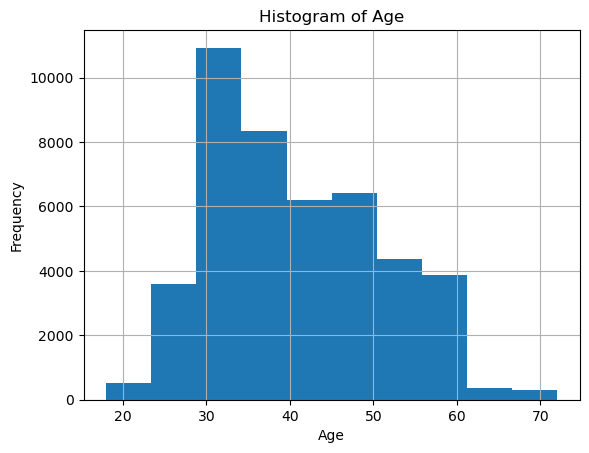

In [37]:
df2.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

<Figure size 3000x1500 with 0 Axes>

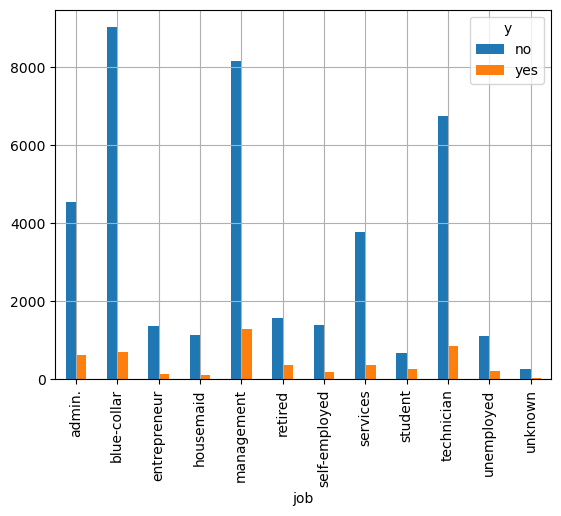

In [38]:
fig = plt.figure(figsize=(30,15)) 
pd.crosstab(df2.job,df2.y).plot(kind="bar")
plt.grid()

<Figure size 3000x1500 with 0 Axes>

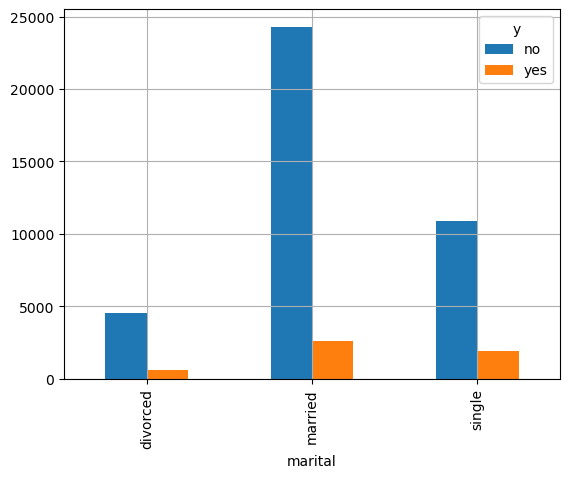

In [39]:
fig = plt.figure(figsize=(30,15)) 
pd.crosstab(df2.marital,df2.y).plot(kind="bar")
plt.grid()

<Figure size 3000x1500 with 0 Axes>

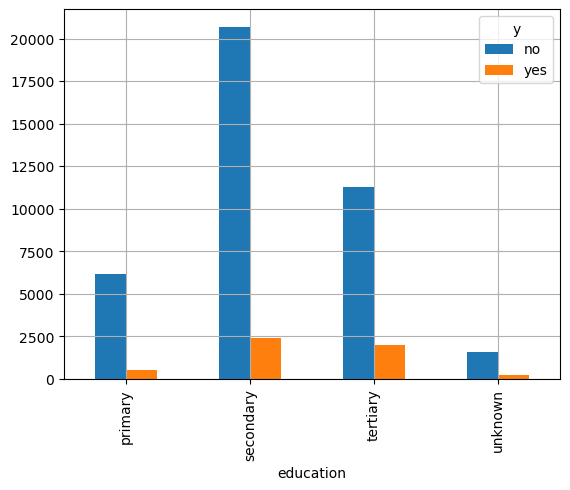

In [40]:
fig = plt.figure(figsize=(30,15)) 
pd.crosstab(df2.education,df2.y).plot(kind="bar")
plt.grid()

<Figure size 3000x1500 with 0 Axes>

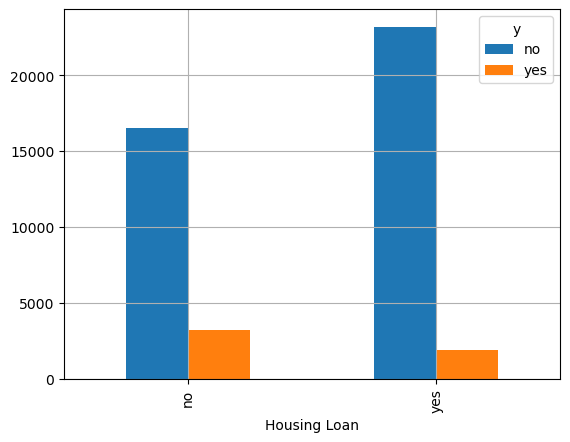

In [41]:
fig = plt.figure(figsize=(30,15))
pd.crosstab(df2.housing,df2.y).plot(kind="bar")
plt.xlabel("Housing Loan")
plt.grid()

<Figure size 3000x1500 with 0 Axes>

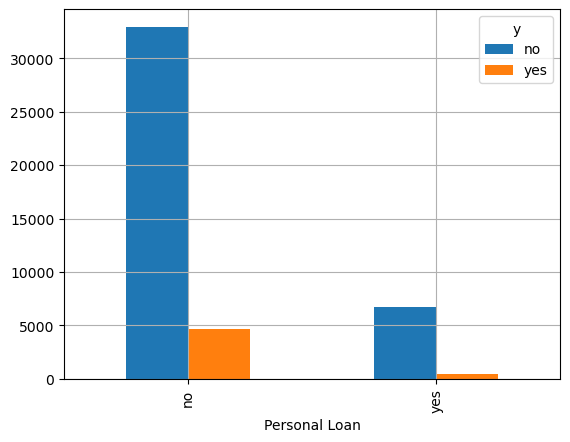

In [42]:
fig = plt.figure(figsize=(30,15)) 
pd.crosstab(df2.loan,df2.y).plot(kind="bar")
plt.xlabel("Personal Loan")
plt.grid()

# Label Encoding

In [45]:
df3=df2.select_dtypes(include='object').columns
df3

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df3:
    df2[i] = le.fit_transform(df2[i].astype(object))

In [47]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


# Select Feature and target

In [83]:
x=df2.iloc[:,0:16]
y=df2.iloc[:,16]

In [84]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [85]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 44830, dtype: int32

# Logistic Regression model

In [88]:
classifier=LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [89]:
classifier.coef_ # coefficients of the features

array([[-3.20398105e-02,  1.78585438e-02, -9.68441460e-02,
         8.12792885e-03, -5.48015911e-03,  3.40376480e-05,
        -2.12655036e-01, -6.17035281e-02, -2.27833963e-01,
        -1.65630282e-02, -6.12994397e-02,  3.55604413e-03,
        -3.01926224e-01, -8.10296563e-04,  1.42895603e-01,
        -1.83677805e-01]])

In [90]:
classifier.predict_proba(x) #Probability values

array([[0.95406165, 0.04593835],
       [0.95536906, 0.04463094],
       [0.95558405, 0.04441595],
       ...,
       [0.64751091, 0.35248909],
       [0.95074804, 0.04925196],
       [0.53201794, 0.46798206]])

# Model Predictions

In [96]:
# Predict for x dataset
y_pred=classifier.predict(x)
df2['y_pred']=y_pred # adding predicted columns in dataset
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1,0
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1,0
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1,0
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0,0


# Model Accuracy - Confusion Matrix

In [98]:
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[39009,   701],
       [ 4217,   903]], dtype=int64)

In [101]:
pd.crosstab(y_pred,y)

y,0,1
row_0,,
0,39009,4217
1,701,903


In [104]:
accuracy=sum(y==y_pred)/df2.shape[0]
accuracy

0.8902966763328128

In [106]:
# As accuracy = 0.89, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0 
classifier.predict_proba(x)[:,1] 

array([0.04593835, 0.04463094, 0.04441595, ..., 0.35248909, 0.04925196,
       0.46798206])

In [107]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39710
           1       0.56      0.18      0.27      5120

    accuracy                           0.89     44830
   macro avg       0.73      0.58      0.60     44830
weighted avg       0.86      0.89      0.86     44830



# ROC Curve and AUC

In [113]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [115]:
Logit_roc_score=roc_auc_score(y,classifier.predict(x))
Logit_roc_score

0.5793571016825106

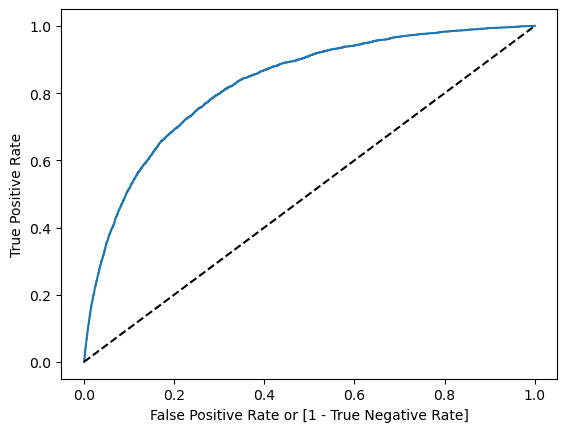

auc accuracy: 0.5793571016825106


In [132]:
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr)
auc=roc_auc_score(y,y_pred)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

In [144]:
import statsmodels.api as sm
logit=sm.Logit(y,x)

In [147]:
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.269839
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                44830
Model:                          Logit   Df Residuals:                    44814
Method:                           MLE   Df Model:                           15
Date:                Mon, 16 Jan 2023   Pseudo R-squ.:                  0.2404
Time:                        13:17:49   Log-Likelihood:                -12097.
converged:                       True   LL-Null:                       -15925.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0310      0.001    -22.250      0.000      -0.034      -0.028
job           -0.0152      0.005     -2.913      0.004      -0.025      -0.005
marital       -0.1846      0.027     -6.963      0.000      -0.237      -0.133
education      0.0698      0.023      3.050      0.002       0.025       0.115
default       -0.3799      0.159     -2.390      0.017      -0.691      -0.068
balance     1.925e-05    4.8e-06      4.011      0.000    9.84e-06    2.87e-05
housing       -1.2381      0.037    -33.452      0.000      -1.311      -1.166
loan          -0.7905      0.057    -13.935      0.000      -0.902      -0.679
contact       -0.6066      0.027    -22.345      0.000      -0.660      -0.553
day           -0.0163      0.002     -8.047      0.000      -0.020      -0.012
month          0.0079      0.005      1.451      0.147      -0.003       0.018
duration       0.0038   6.09e-05     63.072      0.000       0.004       0.004
campaign      -0.1606      0.011    -15.123      0.000      -0.181      -0.140
pdays          0.0006      0.000      2.396      0.017       0.000       0.001
previous       0.0576      0.008      7.126      0.000       0.042       0.073
poutcome      -0.1807      0.023     -7.933      0.000      -0.225      -0.136
==============================================================================
"""

# Improving the model

In [138]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(classifier.predict_proba (x) [:,1]>thres, 1,0)
    accuracy_ls.append(accuracy_score(y, y_pred, normalize=True))
accuracy_ls = pd.concat([pd. Series (thresholds), pd.Series (accuracy_ls)],axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values (by='accuracy', ascending=False, inplace=True)
accuracy_ls

,thresholds,accuracy
775,5.127589e-01,0.890453
780,5.121575e-01,0.890408
778,5.123968e-01,0.890408
776,5.125321e-01,0.890408
696,5.379071e-01,0.890386
...,...,...
7426,2.520039e-04,0.120923
7427,2.502115e-04,0.120901
7428,1.646042e-05,0.116172
7429,1.629200e-05,0.116150


In [140]:
from numpy import argmax
J=tpr-fpr
ix=argmax(J)
best_thresh=thresholds[ix]
print('best threshold=%f' %(best_thresh))

best threshold=0.106280


In [156]:
threshold = 0.106280
preds = np.where(classifier.predict_proba(x) [:,1]>threshold, 1, 0)
print(classification_report(y,preds))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82     39710
           1       0.26      0.78      0.40      5120

    accuracy                           0.73     44830
   macro avg       0.61      0.75      0.61     44830
weighted avg       0.88      0.73      0.77     44830



# NO IMPROVEMENT IN MODEL FIRST MODEL IS BETTER WITH 89% ACCURACY